# Big Ideas Final Project
## Group - Jack Haggerty, Chang Li, Daniel Sawyer 

## Introduction

Our group's approach to finding the best neighborhood was picking metrics that were important to us, and then combining them into a single metric.  Since we didn't really follow a coherent theme for our data sets, creating a scoring system based off of the individual metrics made the most sense.

## Description of Datasets

### Jack Haggerty

The amount of crime in an area has a great influence on where someone might want to live. The dataset I chose was a Police Incident Blotter.  This dataset contains the most recent police reports taken in a given area.  Based off of this information, we can infer the amount of suspicious activity that occurs in a given neighborhood.

### Chang Li
Arrest data contains information on people taken into custody by City of Pittsburgh police officers. More serious crimes such as felony offenses are more likely to result in an arrest. This dataset only contains information reported by City of Pittsburgh Police. It does not contain information about incidents that solely involve other police departments operating within the city (for example, campus police or Port Authority police).


### Daniel Sawyer
Fire incidents could have an impact on how people live. The more likely a fire to start in a neighborhood the less desireable the neighborhood is. This data set has information on fire incidents in Pittsburgh. 

# The Metric

## Police Incidents per Neighborhood - Jack Haggerty

First step is to read in CSV file and store data in policeIncidents_data variable.  I then created a dictionary so I can keep track of frequency of police incidents per neighboorhood.

In [5]:
import pandas as pd
import numpy as np
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
policeIncidents_data = pd.read_csv("PoliceIncidentBlotter.csv")

policeIncidents_dict = dict()


The next step is creating a for loop to load up frequency of incidents per neighborhood.  After that, I created a series, dataPoliceIncidents_series, for better organization.  

In [6]:
for i in range(len(policeIncidents_data)):
    item = policeIncidents_data.loc[i, 'INCIDENTNEIGHBORHOOD']
    if item in policeIncidents_dict: 
        policeIncidents_dict[item] += 1 
    else:
        policeIncidents_dict[item] = 1 
        
dataPoliceIncidents_series = pd.Series(policeIncidents_dict, name = "Incident")

dataPoliceIncidents_series.sort_values()[:]



Mt. Oliver Boro               2
Allegheny West                2
New Homestead                 2
Ridgemont                     2
Esplen                        2
                             ..
Marshall-Shadeland           51
East Liberty                 60
Brookline                    67
Carrick                      67
Central Business District    95
Name: Incident, Length: 95, dtype: int64

My choosen data visualization was a bar graph.  The graph below shows the 20 neighborhoods with the lowest police incidents.  

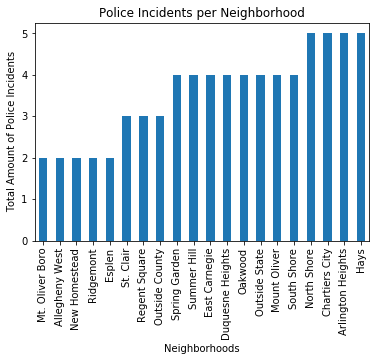

In [7]:
%matplotlib inline

from matplotlib import pyplot as plt

dataPoliceIncidents_series.sort_values(ascending=True)[:20].plot.bar()
plt.title('Police Incidents per Neighborhood')
plt.xlabel('Neighborhoods')
plt.ylabel('Total Amount of Police Incidents')
plt.show()

## Numbers of Arrests per Neighborhood - Chang Li

First read the csv. data into date frame, and create a dictionary

In [8]:
import ssl
import pandas as pd
import numpy as np

ssl._create_default_https_context = ssl._create_unverified_context

df = pd.read_csv("https://data.wprdc.org/datastore/dump/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f")
df_dict = dict()


In [9]:
for i in range(len(df)):
    item = df.loc[i, 'INCIDENTNEIGHBORHOOD']
    if item in df_dict: 
        df_dict[item] += 1 
    else:
        df_dict[item] = 1 
        
dataIncidents_series = pd.Series(df_dict, name = "Incident")

dataIncidents_series.sort_values()[:]

Mt. Oliver Neighborhood         2
Troy Hill-Herrs Island          6
Mt. Oliver Boro                14
Ridgemont                      15
Regent Square                  21
                             ... 
East Allegheny               1404
Carrick                      1484
NaN                          1512
South Side Flats             2150
Central Business District    2399
Name: Incident, Length: 99, dtype: int64

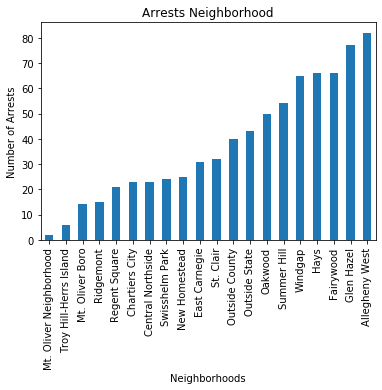

In [10]:
from matplotlib import pyplot as plt

dataIncidents_series.sort_values(ascending=True)[:20].plot.bar()
plt.title('Arrests Neighborhood')
plt.xlabel('Neighborhoods')
plt.ylabel('Number of Arrests')
plt.show()


## Fire Incidents per Neighborhood - Daniel Sawyer

The metric I will be using to determine bestness is the least amount of fire incidents in the neighborhood

First, read in the .csv data into a data frame, and create a dictionary.

In [11]:
import pandas as pd
fire_data = pd.read_csv("Fire Incidents.csv")
fireIncidentsDict = dict()

Then, go through the dataframe and record each case of a fire incident in the dictionary

In [12]:
for i in range(len(fire_data)):
    item = fire_data.loc[i, 'neighborhood']
    if item in fireIncidentsDict: 
        fireIncidentsDict[item] += 1 
    else:
        fireIncidentsDict[item] = 1 
        
dataFireIncidents_series = pd.Series(fireIncidentsDict, name = "Incident")

dataFireIncidents_series.sort_values()[:]

Mount Oliver Borough           6
Regent Square                  6
Mt. Oliver                     7
East Carnegie                  8
Arlington Heights             11
                            ... 
Squirrel Hill South          190
South Side Flats             191
Central Business District    196
Carrick                      226
NaN                          763
Name: Incident, Length: 92, dtype: int64

Finally, display the information in a bar graph

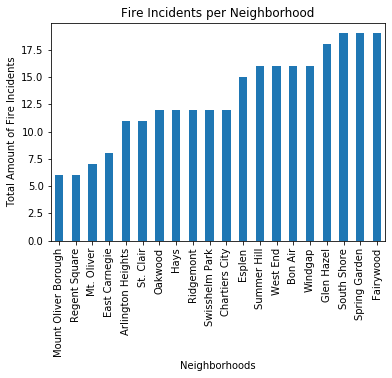

In [13]:
from matplotlib import pyplot as plt

dataFireIncidents_series.sort_values(ascending=True)[:20].plot.bar()
plt.title('Fire Incidents per Neighborhood')
plt.xlabel('Neighborhoods')
plt.ylabel('Total Amount of Fire Incidents')
plt.show()

# Combining our Data into a Single Metric 

In order to combine our different metrics into a single score, we created an overall neighborhood score. Our overall score was based on the number of incidents in a single neighborhood.    

Neighborhood Scoring Guidelines:
* <= 5 incidents equates to score of 1
* 6-20 incidents equates to score of 2
* 21-40 incidents equates to score of 3
* 41-60 incidents equates to score of 4
* 61++ incidents equates to score of 5

A lower neighborhood score indicates a better neighborhood.

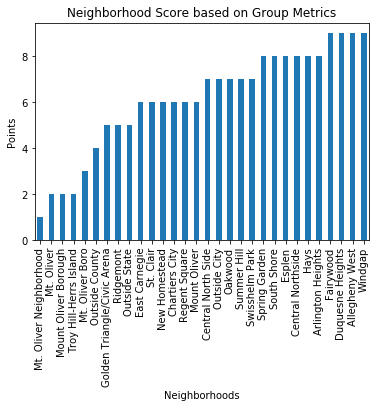

In [29]:
overall_Score_dict = dict() 
for neighborhood in policeIncidents_dict:
    if (neighborhood in overall_Score_dict):
        if (policeIncidents_dict.get(neighborhood) <= 5): overall_Score_dict[neighborhood] += 1
        elif (policeIncidents_dict.get(neighborhood) > 5 and policeIncidents_dict.get(neighborhood) <= 20): overall_Score_dict[neighborhood] += 2
        elif (policeIncidents_dict.get(neighborhood) > 20 and policeIncidents_dict.get(neighborhood) <= 40): overall_Score_dict[neighborhood] += 3
        elif (policeIncidents_dict.get(neighborhood) > 40 and policeIncidents_dict.get(neighborhood) <= 60): overall_Score_dict[neighborhood] += 4
        else: overall_Score_dict[neighborhood] += 5
    else:
        if (policeIncidents_dict.get(neighborhood) <= 5): overall_Score_dict[neighborhood] = 1
        elif (policeIncidents_dict.get(neighborhood) > 5 and policeIncidents_dict.get(neighborhood) <= 20): overall_Score_dict[neighborhood] = 2
        elif (policeIncidents_dict.get(neighborhood) > 20 and policeIncidents_dict.get(neighborhood) <= 40): overall_Score_dict[neighborhood] = 3
        elif (policeIncidents_dict.get(neighborhood) > 40 and policeIncidents_dict.get(neighborhood) <= 60): overall_Score_dict[neighborhood] = 4
        else: overall_Score_dict[neighborhood] = 5
            
for neighborhood in fireIncidentsDict:
    if (neighborhood in overall_Score_dict):
        if (fireIncidentsDict.get(neighborhood) <= 5): overall_Score_dict[neighborhood] += 1
        elif (fireIncidentsDict.get(neighborhood) > 5 and fireIncidentsDict.get(neighborhood) <= 20): overall_Score_dict[neighborhood] += 2
        elif (fireIncidentsDict.get(neighborhood) > 20 and fireIncidentsDict.get(neighborhood) <= 40): overall_Score_dict[neighborhood] += 3
        elif (fireIncidentsDict.get(neighborhood) > 40 and fireIncidentsDict.get(neighborhood) <= 60): overall_Score_dict[neighborhood] += 4
        else: overall_Score_dict[neighborhood] += 5
    else:
        if (fireIncidentsDict.get(neighborhood) <= 5): overall_Score_dict[neighborhood] = 1
        elif (fireIncidentsDict.get(neighborhood) > 5 and fireIncidentsDict.get(neighborhood) <= 20): overall_Score_dict[neighborhood] = 2
        elif (fireIncidentsDict.get(neighborhood) > 20 and fireIncidentsDict.get(neighborhood) <= 40): overall_Score_dict[neighborhood] = 3
        elif (fireIncidentsDict.get(neighborhood) > 40 and fireIncidentsDict.get(neighborhood) <= 60): overall_Score_dict[neighborhood] = 4
        else: overall_Score_dict[neighborhood] = 5
            
for neighborhood in df_dict:
    if (neighborhood in overall_Score_dict):
        if (df_dict.get(neighborhood) <= 5): overall_Score_dict[neighborhood] += 1
        elif (df_dict.get(neighborhood) > 5 and df_dict.get(neighborhood) <= 20): overall_Score_dict[neighborhood] += 2
        elif (df_dict.get(neighborhood) > 20 and df_dict.get(neighborhood) <= 40): overall_Score_dict[neighborhood] += 3
        elif (df_dict.get(neighborhood) > 40 and df_dict.get(neighborhood) <= 60): overall_Score_dict[neighborhood] += 4
        else: overall_Score_dict[neighborhood] += 5
    else:
        if (df_dict.get(neighborhood) <= 5): overall_Score_dict[neighborhood] = 1
        elif (df_dict.get(neighborhood) > 5 and df_dict.get(neighborhood) <= 20): overall_Score_dict[neighborhood] = 2
        elif (df_dict.get(neighborhood) > 20 and df_dict.get(neighborhood) <= 40): overall_Score_dict[neighborhood] = 3
        elif (df_dict.get(neighborhood) > 40 and df_dict.get(neighborhood) <= 60): overall_Score_dict[neighborhood] = 4
        else: overall_Score_dict[neighborhood] = 5
        
overall_Score_series = pd.Series(overall_Score_dict, name = "Overall Score")


from matplotlib import pyplot as plt

overall_Score_series.sort_values(ascending=True)[:30].plot.bar()
plt.title('Neighborhood Score based on Group Metrics')
plt.xlabel('Neighborhoods')
plt.ylabel('Points')
plt.show()

# The Best Neighboorhood

## Jack Haggerty's Results

According to my bar graph, the best neighborhoods are Mt. Oliver Borough, Allegheny West, New Homestead,  Ridgemont, and Esplen.  All of these neighborhoods were all only had 2 incidents with the police.

## Chang Li 

According to my bar graph, the best neighborhoods are Mt. Oliver Neighborhood. This Neighborhood only had 1 arrest case.

## Daniel Sawyer

According to the data, the best neighborhoods are Mount Oliver Borough and Regent Square, with both reporting 12 fire incidents.

# Conclusion

## Jack Haggerty 

According to our neighborhood scoring guidelines, the best neighborhood is Mt. Oliver Borough. Overall, after looking at the data, the Mt. Oliver Borough is pretty appealing.  In terms of my favorite neighborhood, Mt. Oliver Borough ranks highly.  I cannot give a definite answer to what neighborhood I would want to live in, as distance my workplace would rank high for me.  Currently, I'm an unemployed University student.  Therefore, I do not have a job and a favorite neighborhood.  If I was seriously looking for a place to live, I would put try to include aspects of the data driven approach.